In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime



In [2]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [3]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

In [4]:
# Extract historical stock data from Yahoo Finance for each ticker
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Display the first few rows of the extracted data for each ticker
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(stock_data[ticker].head())


Data for AAPL:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725035  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513931  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959510  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200

Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.250000  27.730000  27.150000  27.620001  22.492279  52899300
2013-01-03  27.629999  27.650000  27.160000  27.250000  22.190971  48294400
2013-01-04  27.270000  27.340000  26.730000  26.740000  21.775652  52521100
2013-01-07  26.770000  26.879999  26.639999  26.6

In [6]:
## Data Cleaning

In [7]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [8]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)


In [9]:
# Display the combined data structure
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725035  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513931  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959510  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [10]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JNJ   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JPM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PG    Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
XOM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
NVDA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PFE   Open         0
      High         0
      Low          0
      Close        0
  

In [11]:
# Display the first few rows of the cleaned data
print(combined_data.head())

                 AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725035  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513931  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959510  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37

In [12]:
!pip install prophet

In [13]:
from prophet import Prophet

In [14]:
combined_data_prophet = combined_data.copy()

In [15]:
combined_data_prophet.head()


AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725035  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513931  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959510  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                Close  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194853  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194853  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236654  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985847  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804714  14324300  2.300000  2.300000  2.207333   

                                          
               Close Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

In [16]:
combined_data_prophet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2896 entries, 2013-01-02 to 2024-07-05
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AAPL, Open)       2896 non-null   float64
 1   (AAPL, High)       2896 non-null   float64
 2   (AAPL, Low)        2896 non-null   float64
 3   (AAPL, Close)      2896 non-null   float64
 4   (AAPL, Adj Close)  2896 non-null   float64
 5   (AAPL, Volume)     2896 non-null   int64  
 6   (MSFT, Open)       2896 non-null   float64
 7   (MSFT, High)       2896 non-null   float64
 8   (MSFT, Low)        2896 non-null   float64
 9   (MSFT, Close)      2896 non-null   float64
 10  (MSFT, Adj Close)  2896 non-null   float64
 11  (MSFT, Volume)     2896 non-null   int64  
 12  (JNJ, Open)        2896 non-null   float64
 13  (JNJ, High)        2896 non-null   float64
 14  (JNJ, Low)         2896 non-null   float64
 15  (JNJ, Close)       2896 non-null   float64
 16  (JNJ, 

In [17]:
#notes:
#m = Prophet(multiple_y=True)
#m.add_country_names(df, country_names=['y1', 'y2'])

In [18]:
# Rename columns to 'ds' and 'y' or #prophet_data = combined_data_prophet.columns =["ds", "y"]
combined_data_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [19]:

print(combined_data_prophet.shape)

(2896, 60)


In [20]:
display(combined_data_prophet.head())
display(combined_data_prophet.tail())

AAPL                                                         \
                 Open       High        Low          y  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725035  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513931  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053936  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959510  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002459  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low          y  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                    y  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194853  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194853  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236654  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985847  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804714  14324300  2.300000  2.300000  2.207333   

                                          
                   y Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

AAPL                                                  \
                  Open        High         Low           y   Adj Close   
Date                                                                     
2024-06-28  215.770004  216.070007  210.300003  210.619995  210.619995   
2024-07-01  212.089996  217.509995  211.919998  216.750000  216.750000   
2024-07-02  216.149994  220.380005  215.100006  220.270004  220.270004   
2024-07-03  220.000000  221.550003  219.029999  221.550003  221.550003   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   

                            MSFT                                      ...  \
              Volume        Open        High         Low           y  ...   
Date                                                                  ...   
2024-06-28  82542700  453.070007  455.380005  446.410004  446.950012  ...   
2024-07-01  60402900  448.660004  457.369995  445.660004  456.730011  ...   
2024-07-02  58046200  453.200012  459.589996  453.109985  459.279999  ...   
2024-07-03  37369800  458.190002  461.019989  457.880005  460.769989  ...   
2024-07-05  60330900  459.609985  468.350006  458.970001  467.559998  ...   

                   KO                                        TSLA              \
                  Low          y  Adj Close    Volume        Open        High   
Date                                                                            
2024-06-28  63.520000  63.650002  63.650002  17358800  199.550003  203.199997   
2024-07-01  63.119999  63.279999  63.279999  10033400  201.020004  213.229996   
2024-07-02  62.860001  63.150002  63.150002   8878200  218.889999  231.300003   
2024-07-03  62.930000  63.330002  63.330002   9154200  234.559998  248.350006   
2024-07-05  63.000000  63.759998  63.759998  11733100  249.809998  252.369995   

                                                           
                   Low           y   Adj Close     Volume  
Date                                                       
2024-06-28  195.259995  197.880005  197.880005   95438100  
2024-07-01  200.850006  209.860001  209.860001  135691400  
2024-07-02  218.059998  231.259995  231.259995  205047900  
2024-07-03  234.250000  246.389999  246.389999  166561500  
2024-07-05  242.460007  251.520004  251.520004  154170000  

[5 rows x 60 columns]

In [21]:
combined_data.columns = [f"{ticker}_{attr}" for ticker, attr in combined_data.columns]

In [22]:
combined_data.reset_index(inplace=True)

In [23]:
combined_data.head(252)

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725035,560518000,27.250000,27.730000,27.150000,...,36.660000,37.599998,26.194853,21872400,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513931,352965200,27.629999,27.650000,27.160000,...,37.110001,37.599998,26.194853,16357900,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053936,594333600,27.270000,27.340000,26.730000,...,37.520000,37.660000,26.236654,15311300,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959510,484156400,26.770000,26.879999,26.639999,...,37.099998,37.299999,25.985847,14610200,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002459,458707200,26.750000,26.790001,26.459999,...,36.910000,37.040001,25.804714,14324300,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2013-12-24,20.353214,20.424286,20.215357,20.273930,17.727283,167554800,36.720001,37.169998,36.639999,...,40.099998,40.189999,28.803732,4783800,10.000000,10.331333,9.988000,10.094000,10.094000,149122500
248,2013-12-26,20.289286,20.339287,20.120714,20.139286,17.609558,204008000,37.200001,37.490002,37.169998,...,40.139999,40.490002,29.018747,8588300,10.336000,10.533333,10.286000,10.366667,10.366667,106942500
249,2013-12-27,20.136429,20.157499,19.982143,20.003214,17.490574,225884400,37.580002,37.619999,37.169998,...,40.529999,40.660000,29.140579,6762200,10.353333,10.366667,10.053333,10.074667,10.074667,81903000
250,2013-12-30,19.909286,20.003214,19.725714,19.804285,17.316635,253629600,37.220001,37.380001,36.900002,...,40.759998,41.090000,29.448765,10927500,10.074667,10.320667,10.050000,10.162667,10.162667,67012500


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Function to train and evaluate models for a given stock
def train_and_evaluate(ticker, combined_data):
    # Extract target variable (Close price of the given ticker) and features (all other columns)
    target_column = f'{ticker}_Close'
    y = combined_data[target_column].values
    ds = combined_data["Date"]
    
    prophet_df = pd.DataFrame({'ds': ds, 'y': y})
    
    model = Prophet() 
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=730)  # Forecasting for 1 year (365 days)
    forecast = model.predict(future)
   
    fig = model.plot(forecast)
    ax = fig.gca()
    ax.set_title({ticker})
    plt.show()
   # Display the underlying forecast dataframe (tail)
    display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    
    
   # Reset the index to this datetime column so that our plot looks nice
    forecast = forecast.set_index('ds')

    # Display the DataFrame
    display(forecast.head())

    # Plot predictions for our forecast period
    forecast[['yhat', 'yhat_lower', 'yhat_upper']].plot() 
    plt.title(f'{ticker} - Upper and Lower Bounds')
    plt.show()

    

    # Reset "ds" from the datetime index back to a column
    forecast = forecast.reset_index()
    display(forecast.head())
   
    # Plot the individual time series components of the model
    fig2 = model.plot_components(forecast)
    ax = fig2.gca()
    ax.set_title({ticker})
    plt.show()


Evaluating models for AAPL


16:42:56 - cmdstanpy - INFO - Chain [1] start processing
16:42:57 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


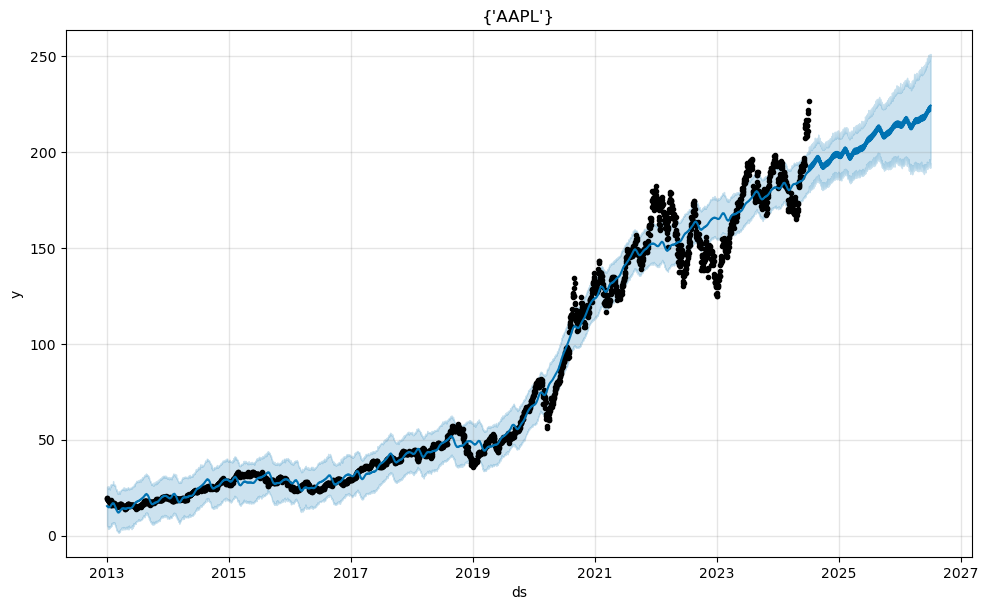

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,221.175842,193.541152,248.534404
3622,2026-07-02,221.170607,194.328078,249.341489
3623,2026-07-03,221.226562,191.662011,249.180612
3624,2026-07-04,224.038195,195.260683,250.993563
3625,2026-07-05,224.105016,196.314902,249.747059


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,15.727982,5.175114,25.368712,15.727982,15.727982,-0.386476,-0.386476,-0.386476,-0.747799,-0.747799,-0.747799,0.361323,0.361323,0.361323,0.0,0.0,0.0,15.341505
2013-01-03,15.737983,4.945767,25.158617,15.737983,15.737983,-0.552846,-0.552846,-0.552846,-0.821872,-0.821872,-0.821872,0.269026,0.269026,0.269026,0.0,0.0,0.0,15.185137
2013-01-04,15.747984,4.818109,25.579151,15.747984,15.747984,-0.654224,-0.654224,-0.654224,-0.833331,-0.833331,-0.833331,0.179107,0.179107,0.179107,0.0,0.0,0.0,15.093760
2013-01-07,15.777986,4.115670,24.405698,15.777986,15.777986,-0.729794,-0.729794,-0.729794,-0.666099,-0.666099,-0.666099,-0.063695,-0.063695,-0.063695,0.0,0.0,0.0,15.048192
2013-01-08,15.787987,3.443457,24.813108,15.787987,15.787987,-0.885409,-0.885409,-0.885409,-0.753983,-0.753983,-0.753983,-0.131425,-0.131425,-0.131425,0.0,0.0,0.0,14.902579


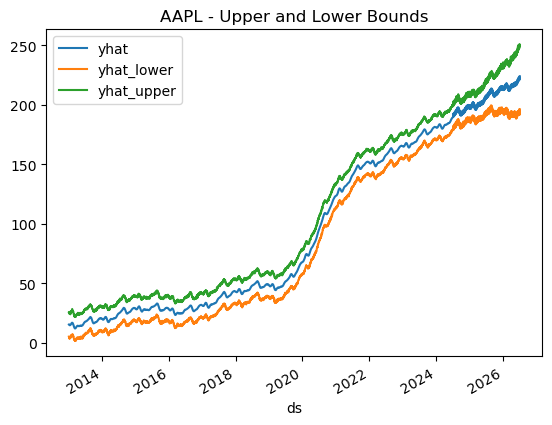

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,15.727982,5.175114,25.368712,15.727982,15.727982,-0.386476,-0.386476,-0.386476,-0.747799,-0.747799,-0.747799,0.361323,0.361323,0.361323,0.0,0.0,0.0,15.341505
1,2013-01-03,15.737983,4.945767,25.158617,15.737983,15.737983,-0.552846,-0.552846,-0.552846,-0.821872,-0.821872,-0.821872,0.269026,0.269026,0.269026,0.0,0.0,0.0,15.185137
2,2013-01-04,15.747984,4.818109,25.579151,15.747984,15.747984,-0.654224,-0.654224,-0.654224,-0.833331,-0.833331,-0.833331,0.179107,0.179107,0.179107,0.0,0.0,0.0,15.093760
3,2013-01-07,15.777986,4.115670,24.405698,15.777986,15.777986,-0.729794,-0.729794,-0.729794,-0.666099,-0.666099,-0.666099,-0.063695,-0.063695,-0.063695,0.0,0.0,0.0,15.048192
4,2013-01-08,15.787987,3.443457,24.813108,15.787987,15.787987,-0.885409,-0.885409,-0.885409,-0.753983,-0.753983,-0.753983,-0.131425,-0.131425,-0.131425,0.0,0.0,0.0,14.902579


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

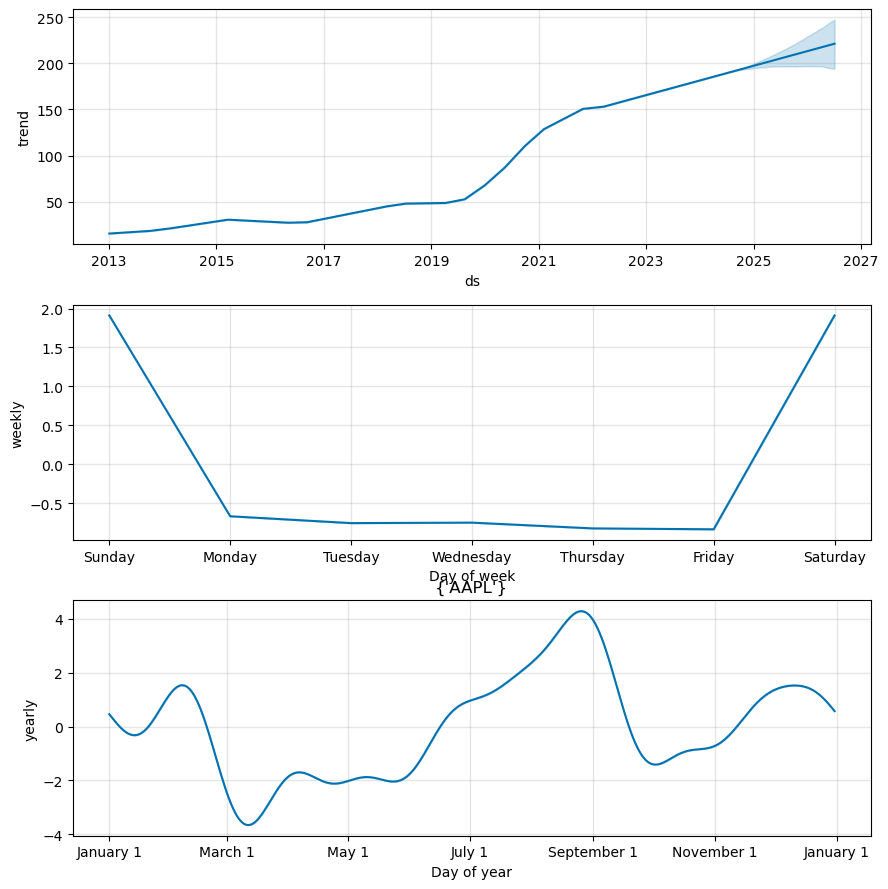


Evaluating models for MSFT


16:42:59 - cmdstanpy - INFO - Chain [1] start processing
16:42:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


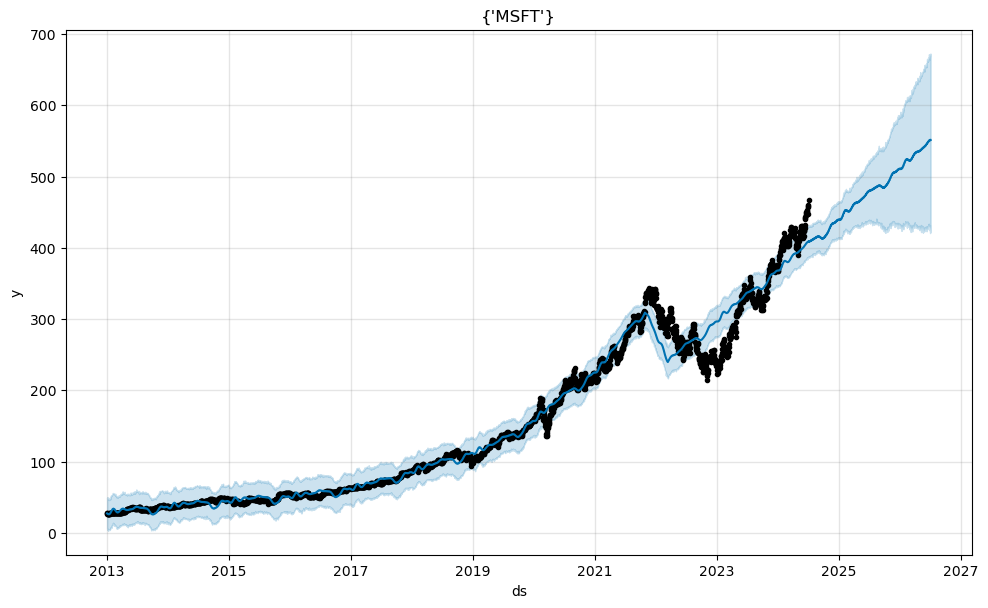

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,551.201702,428.727721,668.492534
3622,2026-07-02,551.348123,420.619716,671.384484
3623,2026-07-03,551.602526,431.263008,669.273054
3624,2026-07-04,551.028279,428.715854,672.620401
3625,2026-07-05,551.125175,422.484568,670.285360


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,28.117188,6.800755,49.464755,28.117188,28.117188,-0.871252,-0.871252,-0.871252,0.123299,0.123299,0.123299,-0.994551,-0.994551,-0.994551,0.0,0.0,0.0,27.245936
2013-01-03,28.140021,4.216289,47.440452,28.140021,28.140021,-1.058628,-1.058628,-1.058628,0.137580,0.137580,0.137580,-1.196207,-1.196207,-1.196207,0.0,0.0,0.0,27.081393
2013-01-04,28.162854,6.036642,49.829846,28.162854,28.162854,-1.127878,-1.127878,-1.127878,0.273258,0.273258,0.273258,-1.401136,-1.401136,-1.401136,0.0,0.0,0.0,27.034976
2013-01-07,28.231353,3.890496,47.206052,28.231353,28.231353,-1.736171,-1.736171,-1.736171,0.251389,0.251389,0.251389,-1.987560,-1.987560,-1.987560,0.0,0.0,0.0,26.495182
2013-01-08,28.254186,2.809305,46.355816,28.254186,28.254186,-2.126546,-2.126546,-2.126546,0.030299,0.030299,0.030299,-2.156845,-2.156845,-2.156845,0.0,0.0,0.0,26.127640


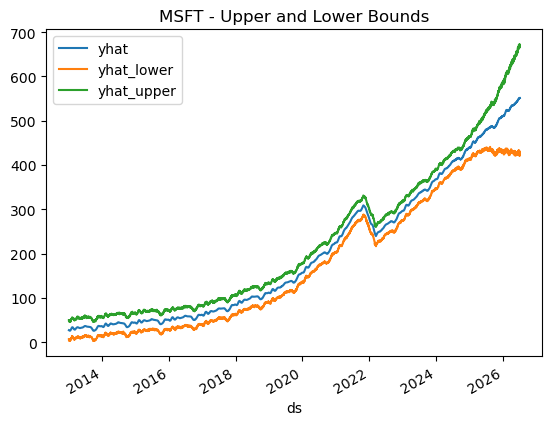

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,28.117188,6.800755,49.464755,28.117188,28.117188,-0.871252,-0.871252,-0.871252,0.123299,0.123299,0.123299,-0.994551,-0.994551,-0.994551,0.0,0.0,0.0,27.245936
1,2013-01-03,28.140021,4.216289,47.440452,28.140021,28.140021,-1.058628,-1.058628,-1.058628,0.137580,0.137580,0.137580,-1.196207,-1.196207,-1.196207,0.0,0.0,0.0,27.081393
2,2013-01-04,28.162854,6.036642,49.829846,28.162854,28.162854,-1.127878,-1.127878,-1.127878,0.273258,0.273258,0.273258,-1.401136,-1.401136,-1.401136,0.0,0.0,0.0,27.034976
3,2013-01-07,28.231353,3.890496,47.206052,28.231353,28.231353,-1.736171,-1.736171,-1.736171,0.251389,0.251389,0.251389,-1.987560,-1.987560,-1.987560,0.0,0.0,0.0,26.495182
4,2013-01-08,28.254186,2.809305,46.355816,28.254186,28.254186,-2.126546,-2.126546,-2.126546,0.030299,0.030299,0.030299,-2.156845,-2.156845,-2.156845,0.0,0.0,0.0,26.127640


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

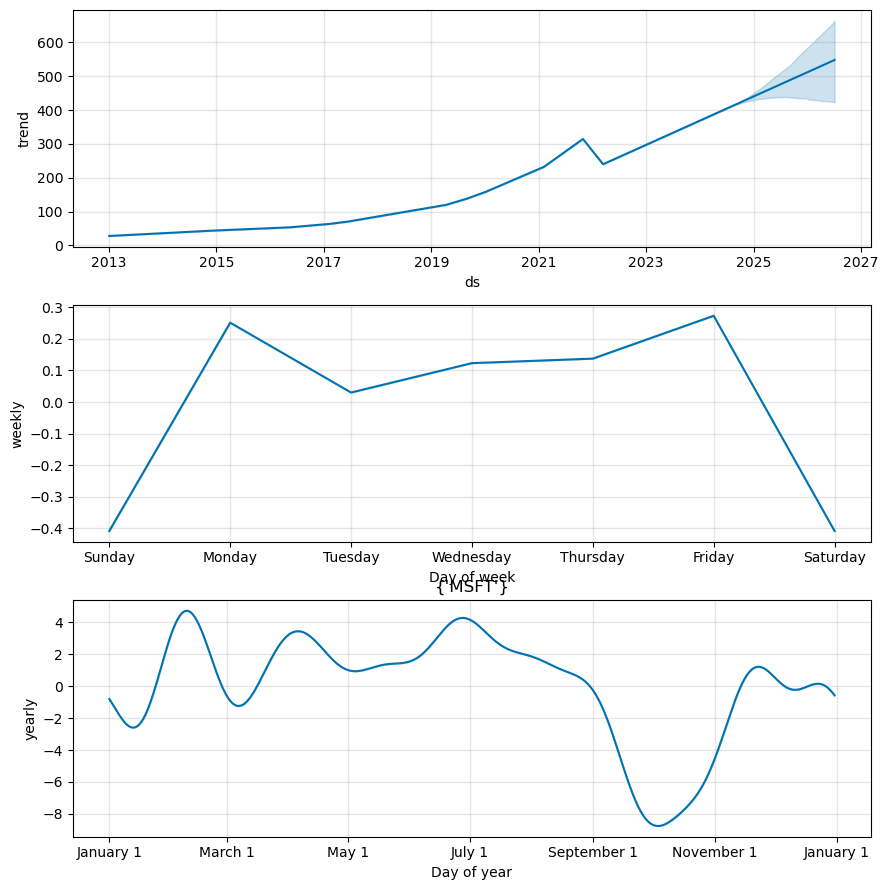


Evaluating models for JNJ


16:43:01 - cmdstanpy - INFO - Chain [1] start processing
16:43:02 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


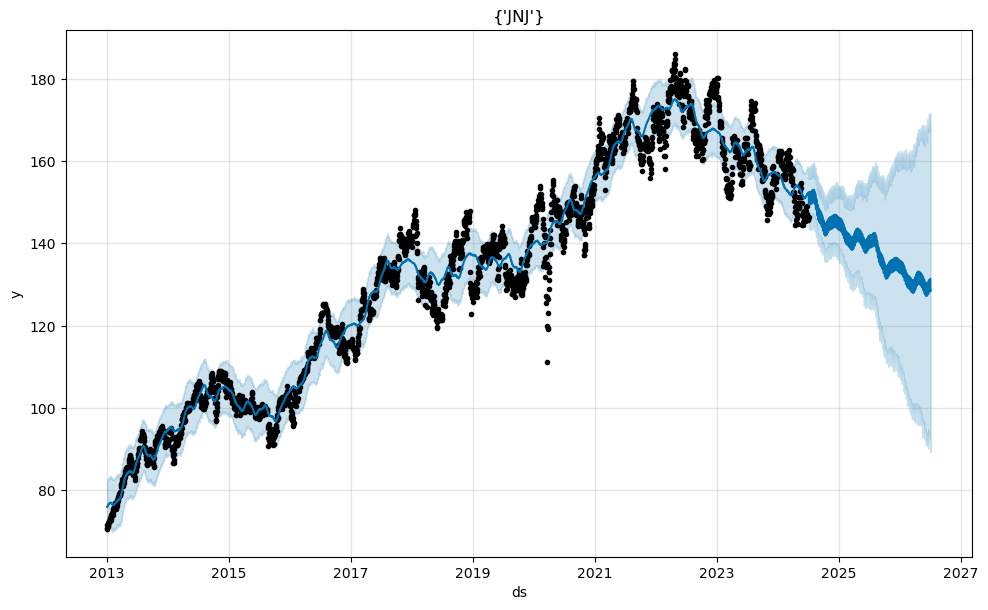

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,131.311682,93.195472,171.404016
3622,2026-07-02,131.376907,92.510656,170.769042
3623,2026-07-03,131.401575,92.968884,171.797537
3624,2026-07-04,128.509108,89.286298,168.802789
3625,2026-07-05,128.528557,89.431403,168.353925


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,74.444548,70.024721,82.104049,74.444548,74.444548,1.561161,1.561161,1.561161,0.839547,0.839547,0.839547,0.721615,0.721615,0.721615,0.0,0.0,0.0,76.005709
2013-01-03,74.506993,70.045447,82.118332,74.506993,74.506993,1.592199,1.592199,1.592199,0.866314,0.866314,0.866314,0.725885,0.725885,0.725885,0.0,0.0,0.0,76.099192
2013-01-04,74.569438,70.204397,82.500910,74.569438,74.569438,1.590974,1.590974,1.590974,0.859202,0.859202,0.859202,0.731772,0.731772,0.731772,0.0,0.0,0.0,76.160412
2013-01-07,74.756772,69.721851,82.483417,74.756772,74.756772,1.448280,1.448280,1.448280,0.693315,0.693315,0.693315,0.754965,0.754965,0.754965,0.0,0.0,0.0,76.205052
2013-01-08,74.819217,70.465719,82.952090,74.819217,74.819217,1.621736,1.621736,1.621736,0.858924,0.858924,0.858924,0.762812,0.762812,0.762812,0.0,0.0,0.0,76.440953


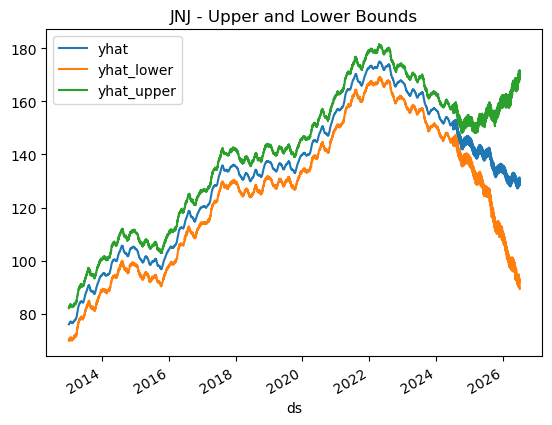

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,74.444548,70.024721,82.104049,74.444548,74.444548,1.561161,1.561161,1.561161,0.839547,0.839547,0.839547,0.721615,0.721615,0.721615,0.0,0.0,0.0,76.005709
1,2013-01-03,74.506993,70.045447,82.118332,74.506993,74.506993,1.592199,1.592199,1.592199,0.866314,0.866314,0.866314,0.725885,0.725885,0.725885,0.0,0.0,0.0,76.099192
2,2013-01-04,74.569438,70.204397,82.500910,74.569438,74.569438,1.590974,1.590974,1.590974,0.859202,0.859202,0.859202,0.731772,0.731772,0.731772,0.0,0.0,0.0,76.160412
3,2013-01-07,74.756772,69.721851,82.483417,74.756772,74.756772,1.448280,1.448280,1.448280,0.693315,0.693315,0.693315,0.754965,0.754965,0.754965,0.0,0.0,0.0,76.205052
4,2013-01-08,74.819217,70.465719,82.952090,74.819217,74.819217,1.621736,1.621736,1.621736,0.858924,0.858924,0.858924,0.762812,0.762812,0.762812,0.0,0.0,0.0,76.440953


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

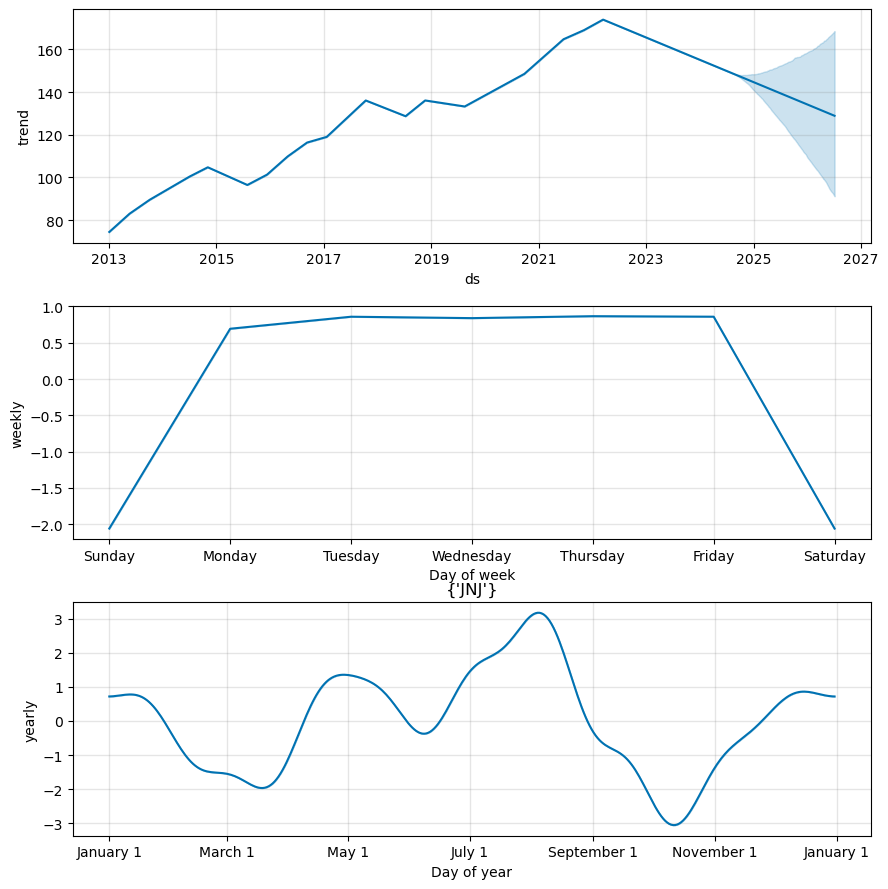


Evaluating models for JPM


16:43:04 - cmdstanpy - INFO - Chain [1] start processing
16:43:05 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


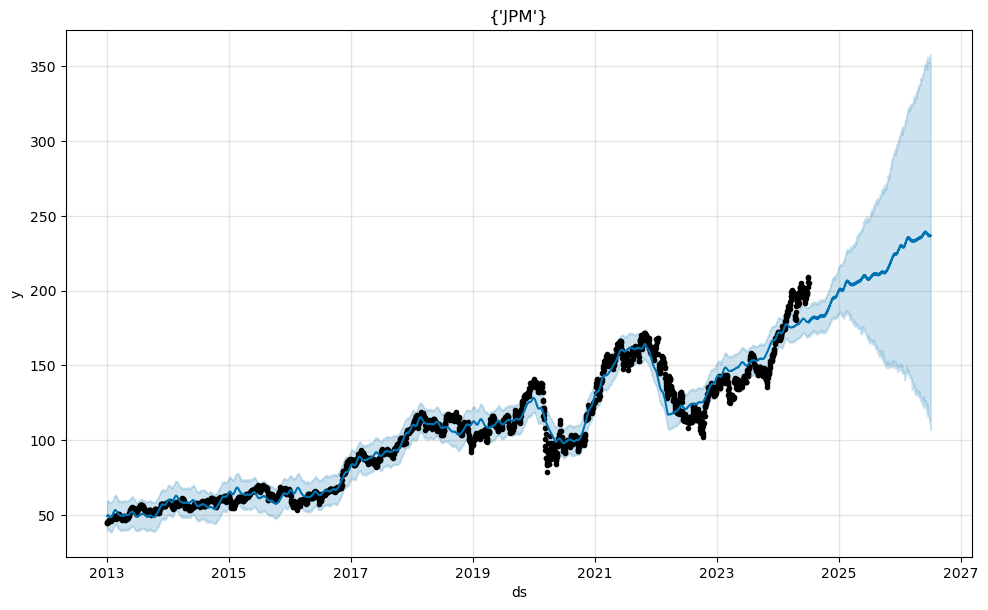

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,237.160002,112.722885,353.863335
3622,2026-07-02,237.231255,113.344613,358.229960
3623,2026-07-03,237.372536,115.437915,357.216295
3624,2026-07-04,236.462348,112.948599,354.641485
3625,2026-07-05,236.559673,106.884337,353.514012


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,44.941678,39.541328,59.144538,44.941678,44.941678,4.387314,4.387314,4.387314,0.215459,0.215459,0.215459,4.171854,4.171854,4.171854,0.0,0.0,0.0,49.328992
2013-01-03,44.975753,39.829214,59.230555,44.975753,44.975753,4.514186,4.514186,4.514186,0.227862,0.227862,0.227862,4.286324,4.286324,4.286324,0.0,0.0,0.0,49.489939
2013-01-04,45.009828,40.577391,59.383352,45.009828,45.009828,4.670845,4.670845,4.670845,0.296186,0.296186,0.296186,4.374658,4.374658,4.374658,0.0,0.0,0.0,49.680672
2013-01-07,45.112052,40.581403,59.816464,45.112052,45.112052,4.784906,4.784906,4.784906,0.314995,0.314995,0.314995,4.469911,4.469911,4.469911,0.0,0.0,0.0,49.896958
2013-01-08,45.146126,40.239118,58.957737,45.146126,45.146126,4.789087,4.789087,4.789087,0.345134,0.345134,0.345134,4.443953,4.443953,4.443953,0.0,0.0,0.0,49.935213


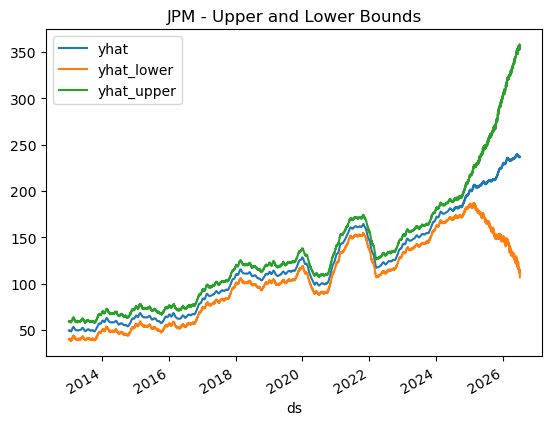

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,44.941678,39.541328,59.144538,44.941678,44.941678,4.387314,4.387314,4.387314,0.215459,0.215459,0.215459,4.171854,4.171854,4.171854,0.0,0.0,0.0,49.328992
1,2013-01-03,44.975753,39.829214,59.230555,44.975753,44.975753,4.514186,4.514186,4.514186,0.227862,0.227862,0.227862,4.286324,4.286324,4.286324,0.0,0.0,0.0,49.489939
2,2013-01-04,45.009828,40.577391,59.383352,45.009828,45.009828,4.670845,4.670845,4.670845,0.296186,0.296186,0.296186,4.374658,4.374658,4.374658,0.0,0.0,0.0,49.680672
3,2013-01-07,45.112052,40.581403,59.816464,45.112052,45.112052,4.784906,4.784906,4.784906,0.314995,0.314995,0.314995,4.469911,4.469911,4.469911,0.0,0.0,0.0,49.896958
4,2013-01-08,45.146126,40.239118,58.957737,45.146126,45.146126,4.789087,4.789087,4.789087,0.345134,0.345134,0.345134,4.443953,4.443953,4.443953,0.0,0.0,0.0,49.935213


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

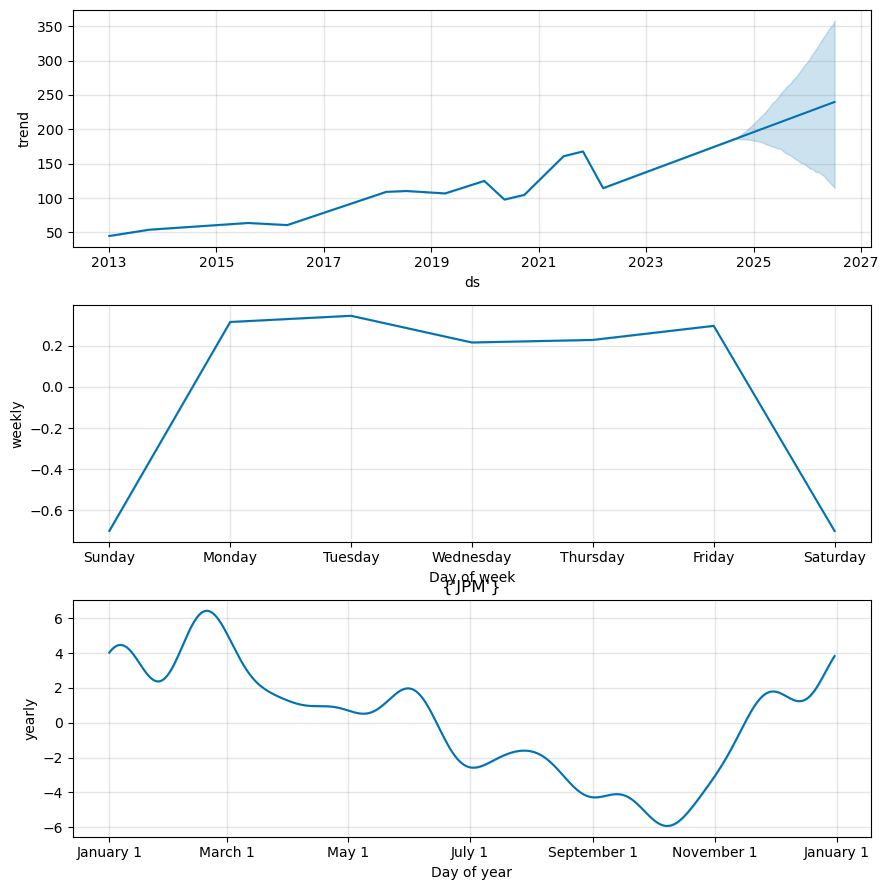


Evaluating models for PG


16:43:07 - cmdstanpy - INFO - Chain [1] start processing
16:43:07 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


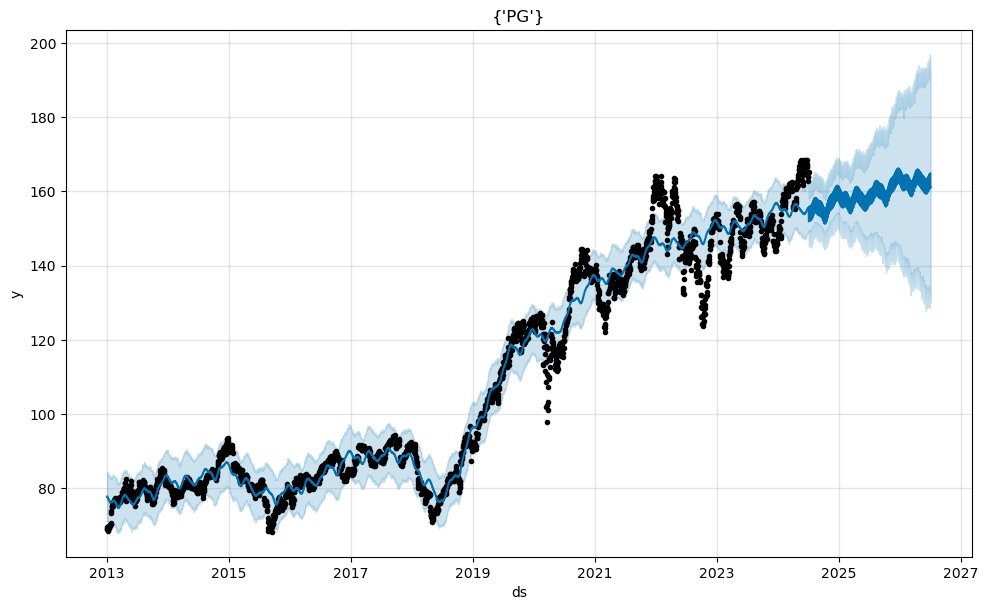

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,164.659184,133.126040,197.077985
3622,2026-07-02,164.673005,131.618766,196.372499
3623,2026-07-03,164.883920,131.325350,195.541767
3624,2026-07-04,161.068939,130.514841,192.205285
3625,2026-07-05,161.114626,129.993873,191.980306


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,74.294505,71.063099,84.168284,74.294505,74.294505,3.407811,3.407811,3.407811,1.035718,1.035718,1.035718,2.372093,2.372093,2.372093,0.0,0.0,0.0,77.702315
2013-01-03,74.308904,71.006121,84.262502,74.308904,74.308904,3.260139,3.260139,3.260139,0.984989,0.984989,0.984989,2.275150,2.275150,2.275150,0.0,0.0,0.0,77.569043
2013-01-04,74.323304,71.155284,84.348803,74.323304,74.323304,3.310650,3.310650,3.310650,1.137662,1.137662,1.137662,2.172988,2.172988,2.172988,0.0,0.0,0.0,77.633953
2013-01-07,74.366503,70.958166,83.951459,74.366503,74.366503,3.018840,3.018840,3.018840,1.174861,1.174861,1.174861,1.843979,1.843979,1.843979,0.0,0.0,0.0,77.385343
2013-01-08,74.380902,70.565075,83.807771,74.380902,74.380902,2.855185,2.855185,2.855185,1.125199,1.125199,1.125199,1.729986,1.729986,1.729986,0.0,0.0,0.0,77.236088


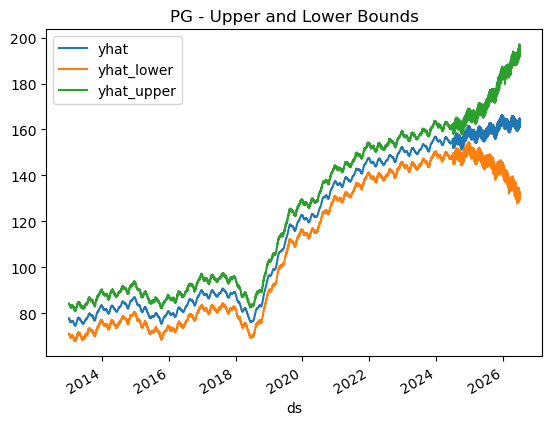

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,74.294505,71.063099,84.168284,74.294505,74.294505,3.407811,3.407811,3.407811,1.035718,1.035718,1.035718,2.372093,2.372093,2.372093,0.0,0.0,0.0,77.702315
1,2013-01-03,74.308904,71.006121,84.262502,74.308904,74.308904,3.260139,3.260139,3.260139,0.984989,0.984989,0.984989,2.275150,2.275150,2.275150,0.0,0.0,0.0,77.569043
2,2013-01-04,74.323304,71.155284,84.348803,74.323304,74.323304,3.310650,3.310650,3.310650,1.137662,1.137662,1.137662,2.172988,2.172988,2.172988,0.0,0.0,0.0,77.633953
3,2013-01-07,74.366503,70.958166,83.951459,74.366503,74.366503,3.018840,3.018840,3.018840,1.174861,1.174861,1.174861,1.843979,1.843979,1.843979,0.0,0.0,0.0,77.385343
4,2013-01-08,74.380902,70.565075,83.807771,74.380902,74.380902,2.855185,2.855185,2.855185,1.125199,1.125199,1.125199,1.729986,1.729986,1.729986,0.0,0.0,0.0,77.236088


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

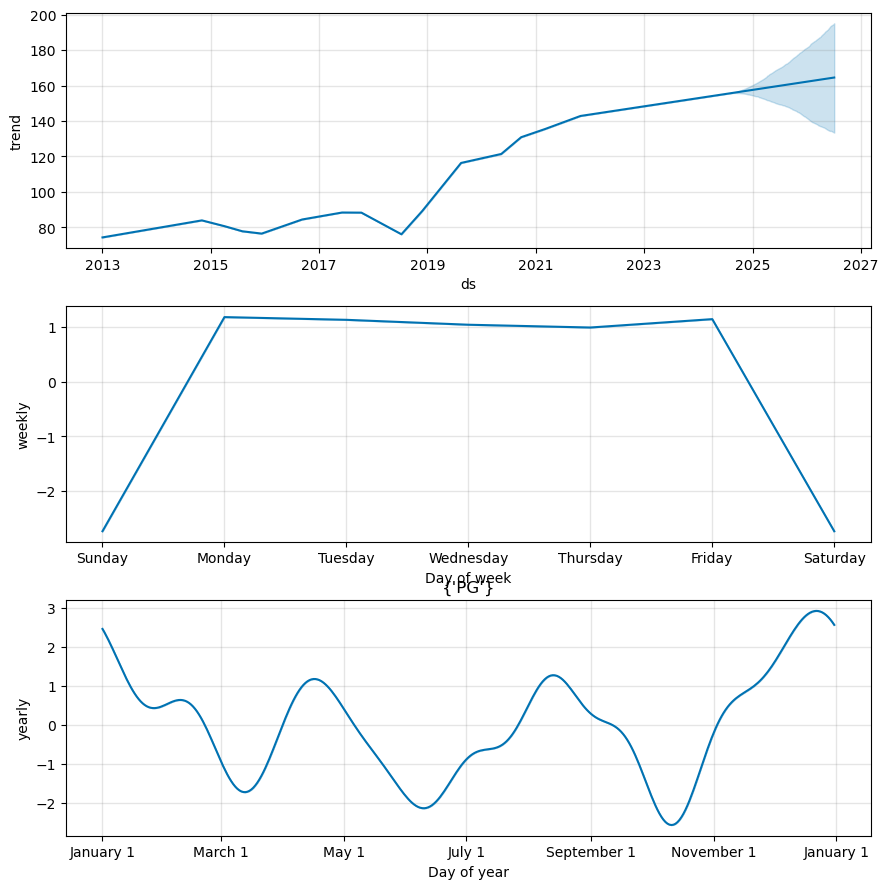


Evaluating models for XOM


16:43:09 - cmdstanpy - INFO - Chain [1] start processing
16:43:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


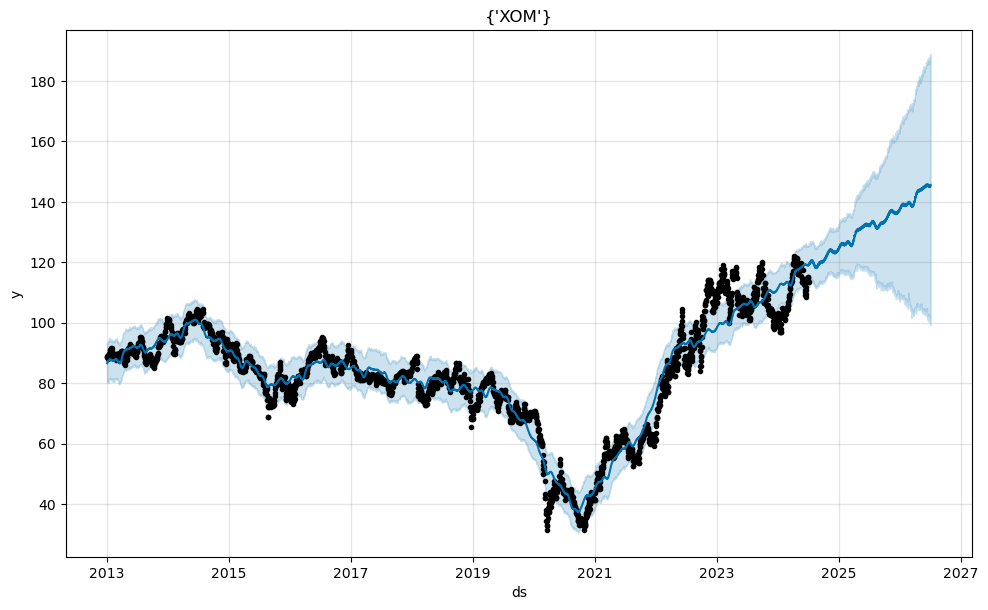

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,144.853602,101.486939,185.679298
3622,2026-07-02,144.862900,100.882244,188.865232
3623,2026-07-03,144.900120,99.235505,186.849099
3624,2026-07-04,145.498947,100.560032,188.152096
3625,2026-07-05,145.530182,102.174188,188.536913


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,87.162325,80.335048,93.334776,87.162325,87.162325,-0.580154,-0.580154,-0.580154,-0.190876,-0.190876,-0.190876,-0.389277,-0.389277,-0.389277,0.0,0.0,0.0,86.582171
2013-01-03,87.184227,80.447981,93.288373,87.184227,87.184227,-0.499452,-0.499452,-0.499452,-0.186470,-0.186470,-0.186470,-0.312982,-0.312982,-0.312982,0.0,0.0,0.0,86.684774
2013-01-04,87.206128,80.396794,92.871406,87.206128,87.206128,-0.397701,-0.397701,-0.397701,-0.162575,-0.162575,-0.162575,-0.235126,-0.235126,-0.235126,0.0,0.0,0.0,86.808428
2013-01-07,87.271833,80.357073,93.673391,87.271833,87.271833,-0.202971,-0.202971,-0.202971,-0.201992,-0.201992,-0.201992,-0.000979,-0.000979,-0.000979,0.0,0.0,0.0,87.068862
2013-01-08,87.293735,81.225775,93.454996,87.293735,87.293735,-0.012219,-0.012219,-0.012219,-0.086246,-0.086246,-0.086246,0.074027,0.074027,0.074027,0.0,0.0,0.0,87.281516


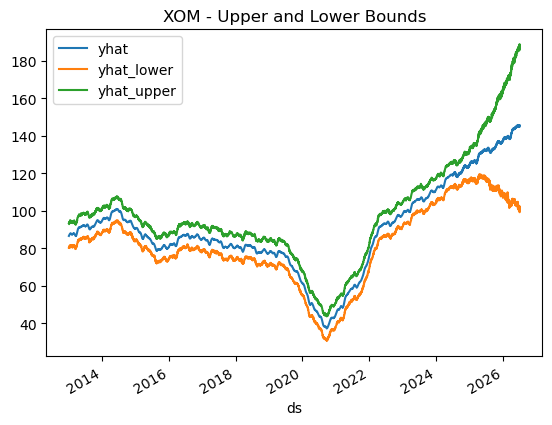

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,87.162325,80.335048,93.334776,87.162325,87.162325,-0.580154,-0.580154,-0.580154,-0.190876,-0.190876,-0.190876,-0.389277,-0.389277,-0.389277,0.0,0.0,0.0,86.582171
1,2013-01-03,87.184227,80.447981,93.288373,87.184227,87.184227,-0.499452,-0.499452,-0.499452,-0.186470,-0.186470,-0.186470,-0.312982,-0.312982,-0.312982,0.0,0.0,0.0,86.684774
2,2013-01-04,87.206128,80.396794,92.871406,87.206128,87.206128,-0.397701,-0.397701,-0.397701,-0.162575,-0.162575,-0.162575,-0.235126,-0.235126,-0.235126,0.0,0.0,0.0,86.808428
3,2013-01-07,87.271833,80.357073,93.673391,87.271833,87.271833,-0.202971,-0.202971,-0.202971,-0.201992,-0.201992,-0.201992,-0.000979,-0.000979,-0.000979,0.0,0.0,0.0,87.068862
4,2013-01-08,87.293735,81.225775,93.454996,87.293735,87.293735,-0.012219,-0.012219,-0.012219,-0.086246,-0.086246,-0.086246,0.074027,0.074027,0.074027,0.0,0.0,0.0,87.281516


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

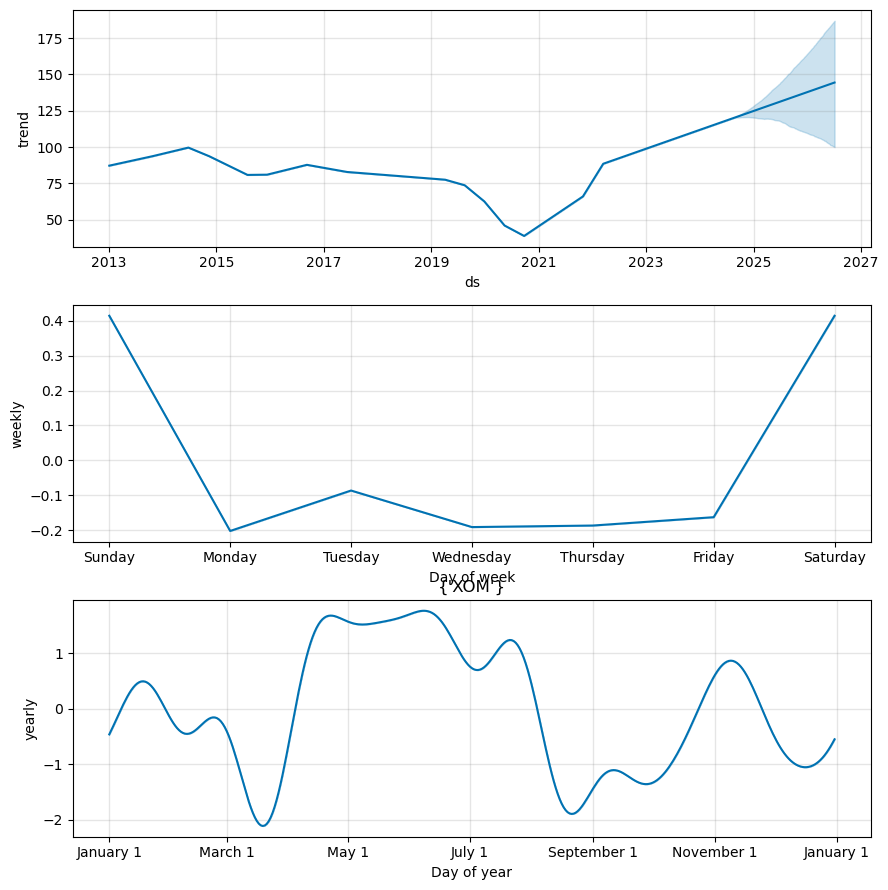


Evaluating models for NVDA


16:43:12 - cmdstanpy - INFO - Chain [1] start processing
16:43:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


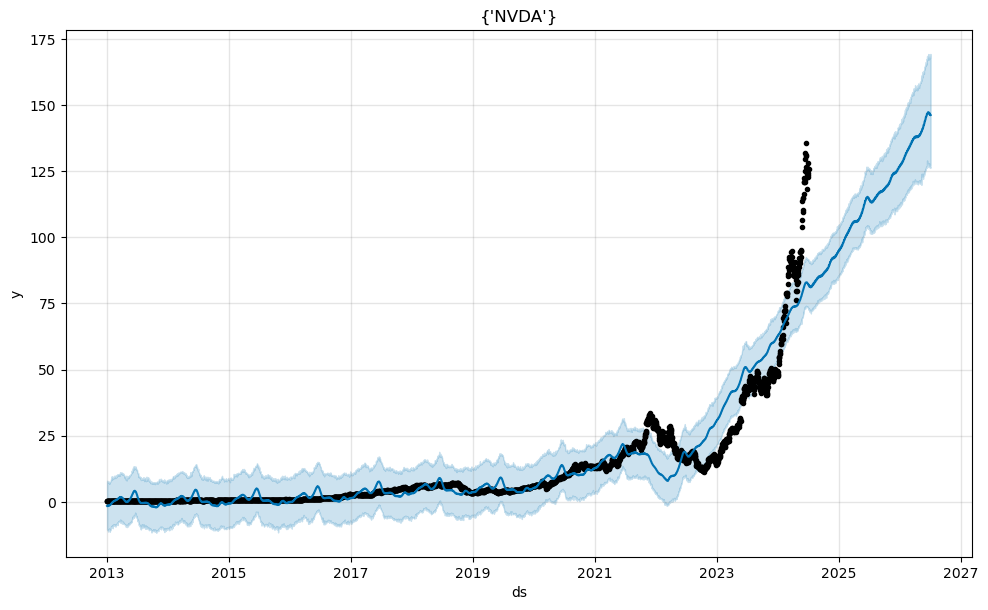

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,146.335514,126.487621,168.517707
3622,2026-07-02,146.300235,126.684401,167.849037
3623,2026-07-03,146.222840,126.233003,167.967061
3624,2026-07-04,146.425406,126.865836,169.372360
3625,2026-07-05,146.312703,127.371118,168.623523


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,-0.155611,-10.523367,7.711696,-0.155611,-0.155611,-1.442504,-1.442504,-1.442504,-0.189723,-0.189723,-0.189723,-1.252781,-1.252781,-1.252781,0.0,0.0,0.0,-1.598114
2013-01-03,-0.154434,-10.347157,7.943750,-0.154434,-0.154434,-1.365284,-1.365284,-1.365284,-0.114410,-0.114410,-0.114410,-1.250874,-1.250874,-1.250874,0.0,0.0,0.0,-1.519719
2013-01-04,-0.153258,-10.390399,7.546769,-0.153258,-0.153258,-1.329425,-1.329425,-1.329425,-0.078669,-0.078669,-0.078669,-1.250755,-1.250755,-1.250755,0.0,0.0,0.0,-1.482683
2013-01-07,-0.149730,-10.948188,7.352662,-0.149730,-0.149730,-1.269793,-1.269793,-1.269793,-0.014449,-0.014449,-0.014449,-1.255344,-1.255344,-1.255344,0.0,0.0,0.0,-1.419523
2013-01-08,-0.148554,-11.289866,7.803494,-0.148554,-0.148554,-1.334554,-1.334554,-1.334554,-0.078192,-0.078192,-0.078192,-1.256361,-1.256361,-1.256361,0.0,0.0,0.0,-1.483107


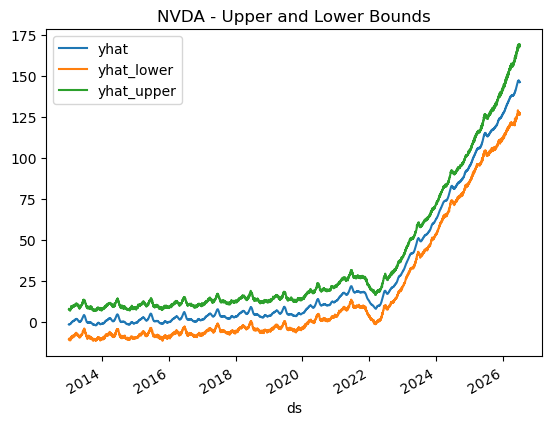

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,-0.155611,-10.523367,7.711696,-0.155611,-0.155611,-1.442504,-1.442504,-1.442504,-0.189723,-0.189723,-0.189723,-1.252781,-1.252781,-1.252781,0.0,0.0,0.0,-1.598114
1,2013-01-03,-0.154434,-10.347157,7.943750,-0.154434,-0.154434,-1.365284,-1.365284,-1.365284,-0.114410,-0.114410,-0.114410,-1.250874,-1.250874,-1.250874,0.0,0.0,0.0,-1.519719
2,2013-01-04,-0.153258,-10.390399,7.546769,-0.153258,-0.153258,-1.329425,-1.329425,-1.329425,-0.078669,-0.078669,-0.078669,-1.250755,-1.250755,-1.250755,0.0,0.0,0.0,-1.482683
3,2013-01-07,-0.149730,-10.948188,7.352662,-0.149730,-0.149730,-1.269793,-1.269793,-1.269793,-0.014449,-0.014449,-0.014449,-1.255344,-1.255344,-1.255344,0.0,0.0,0.0,-1.419523
4,2013-01-08,-0.148554,-11.289866,7.803494,-0.148554,-0.148554,-1.334554,-1.334554,-1.334554,-0.078192,-0.078192,-0.078192,-1.256361,-1.256361,-1.256361,0.0,0.0,0.0,-1.483107


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

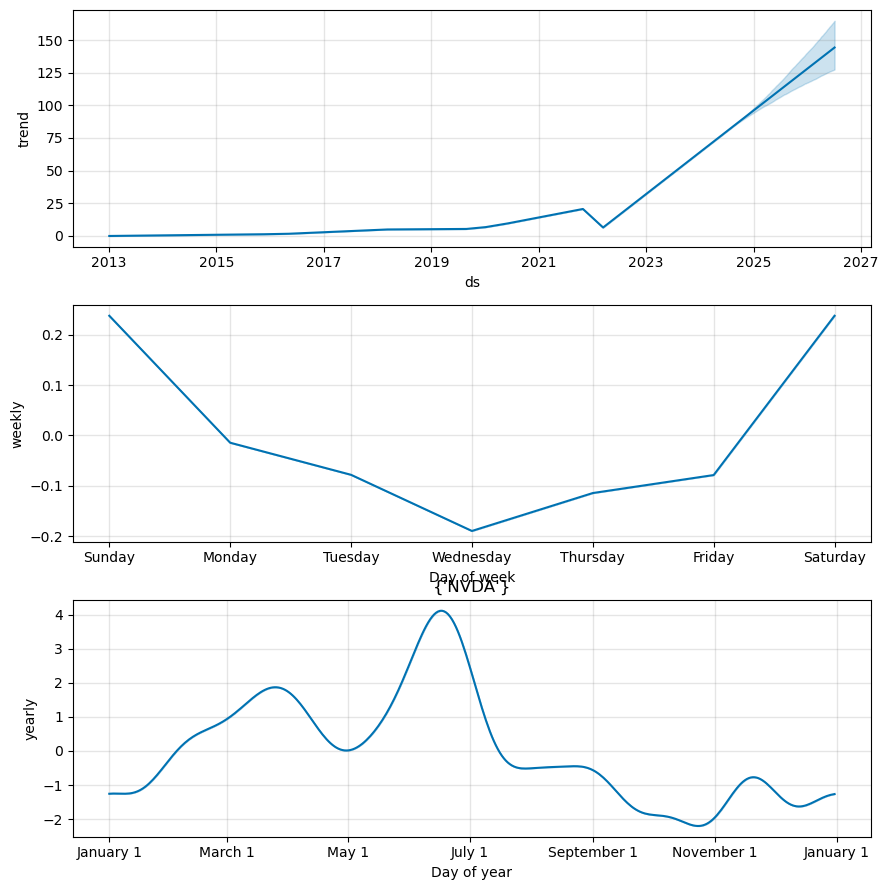


Evaluating models for PFE


16:43:14 - cmdstanpy - INFO - Chain [1] start processing
16:43:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


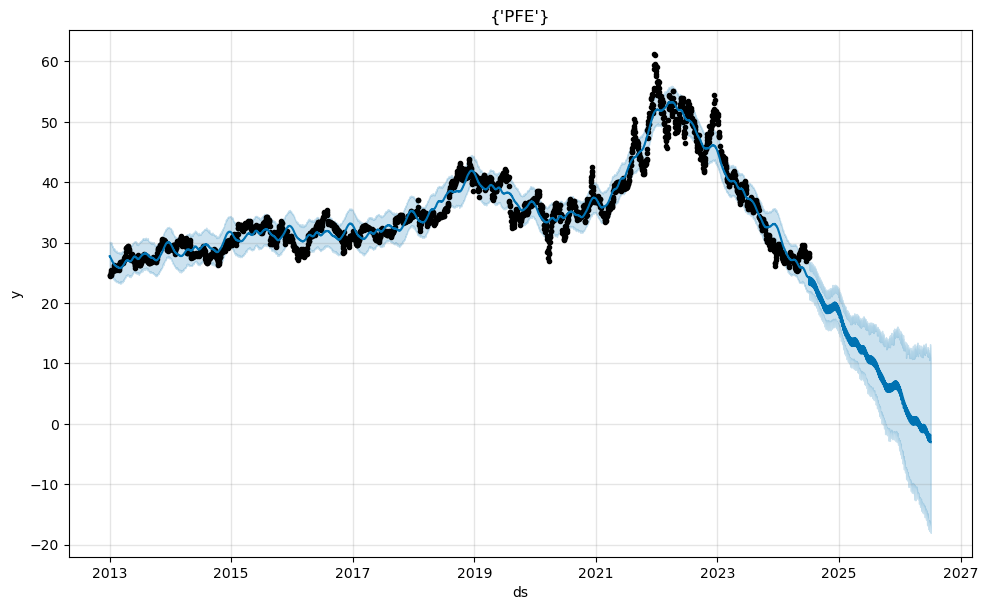

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,-1.827784,-16.712716,13.193959
3622,2026-07-02,-1.864003,-16.347957,12.860117
3623,2026-07-03,-1.811950,-16.850306,12.456202
3624,2026-07-04,-3.045836,-17.190044,11.442163
3625,2026-07-05,-3.050595,-18.045387,10.959532


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,26.133782,25.492390,30.120027,26.133782,26.133782,1.609707,1.609707,1.609707,0.339661,0.339661,0.339661,1.270046,1.270046,1.270046,0.0,0.0,0.0,27.743490
2013-01-03,26.139456,25.040714,30.132702,26.139456,26.139456,1.538415,1.538415,1.538415,0.312043,0.312043,0.312043,1.226372,1.226372,1.226372,0.0,0.0,0.0,27.677871
2013-01-04,26.145130,25.264953,30.123482,26.145130,26.145130,1.551044,1.551044,1.551044,0.370984,0.370984,0.370984,1.180060,1.180060,1.180060,0.0,0.0,0.0,27.696174
2013-01-07,26.162152,25.082525,29.962729,26.162152,26.162152,1.375699,1.375699,1.375699,0.349486,0.349486,0.349486,1.026213,1.026213,1.026213,0.0,0.0,0.0,27.537851
2013-01-08,26.167826,24.888809,29.866022,26.167826,26.167826,1.312811,1.312811,1.312811,0.342413,0.342413,0.342413,0.970398,0.970398,0.970398,0.0,0.0,0.0,27.480637


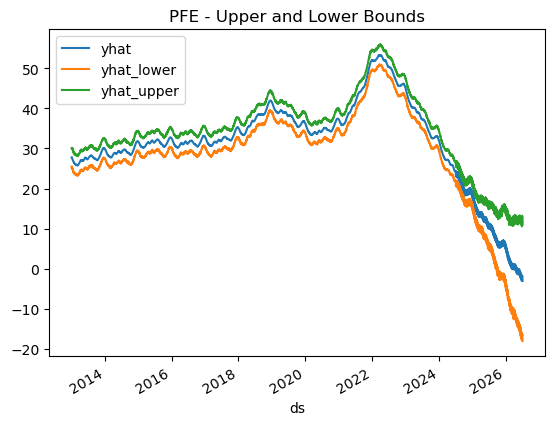

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,26.133782,25.492390,30.120027,26.133782,26.133782,1.609707,1.609707,1.609707,0.339661,0.339661,0.339661,1.270046,1.270046,1.270046,0.0,0.0,0.0,27.743490
1,2013-01-03,26.139456,25.040714,30.132702,26.139456,26.139456,1.538415,1.538415,1.538415,0.312043,0.312043,0.312043,1.226372,1.226372,1.226372,0.0,0.0,0.0,27.677871
2,2013-01-04,26.145130,25.264953,30.123482,26.145130,26.145130,1.551044,1.551044,1.551044,0.370984,0.370984,0.370984,1.180060,1.180060,1.180060,0.0,0.0,0.0,27.696174
3,2013-01-07,26.162152,25.082525,29.962729,26.162152,26.162152,1.375699,1.375699,1.375699,0.349486,0.349486,0.349486,1.026213,1.026213,1.026213,0.0,0.0,0.0,27.537851
4,2013-01-08,26.167826,24.888809,29.866022,26.167826,26.167826,1.312811,1.312811,1.312811,0.342413,0.342413,0.342413,0.970398,0.970398,0.970398,0.0,0.0,0.0,27.480637


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

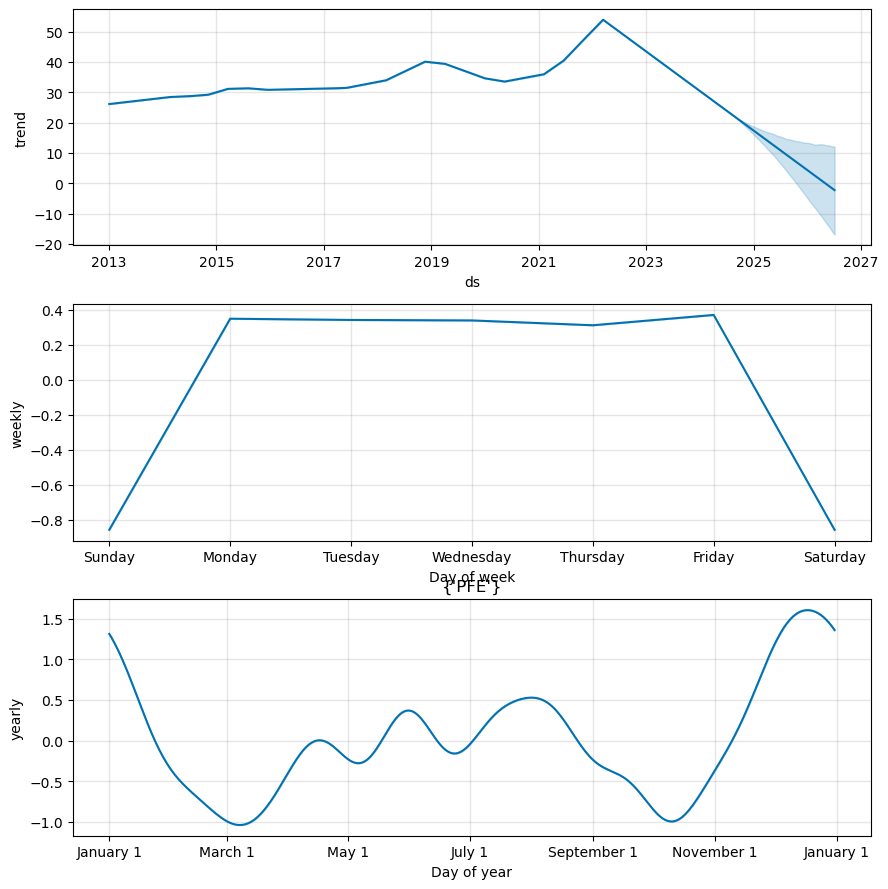


Evaluating models for KO


16:43:17 - cmdstanpy - INFO - Chain [1] start processing
16:43:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


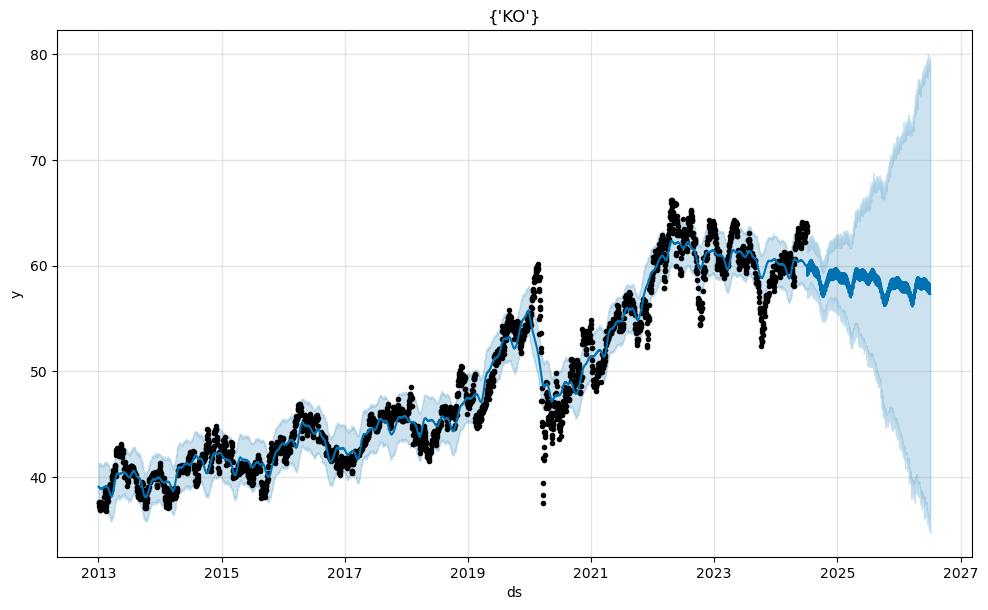

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,58.279881,35.841567,79.595586
3622,2026-07-02,58.240647,36.304994,79.467439
3623,2026-07-03,58.263201,35.613879,79.717479
3624,2026-07-04,57.289631,35.011038,79.123760
3625,2026-07-05,57.294783,34.743804,78.909608


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,38.495156,36.790913,41.285632,38.495156,38.495156,0.591871,0.591871,0.591871,0.285722,0.285722,0.285722,0.306149,0.306149,0.306149,0.0,0.0,0.0,39.087027
2013-01-03,38.503040,36.923079,41.373480,38.503040,38.503040,0.536176,0.536176,0.536176,0.251521,0.251521,0.251521,0.284655,0.284655,0.284655,0.0,0.0,0.0,39.039216
2013-01-04,38.510925,36.766799,41.169399,38.510925,38.510925,0.538062,0.538062,0.538062,0.275844,0.275844,0.275844,0.262218,0.262218,0.262218,0.0,0.0,0.0,39.048987
2013-01-07,38.534579,37.027211,41.339609,38.534579,38.534579,0.478388,0.478388,0.478388,0.285745,0.285745,0.285745,0.192642,0.192642,0.192642,0.0,0.0,0.0,39.012966
2013-01-08,38.542463,36.801370,41.327539,38.542463,38.542463,0.469705,0.469705,0.469705,0.299900,0.299900,0.299900,0.169806,0.169806,0.169806,0.0,0.0,0.0,39.012169


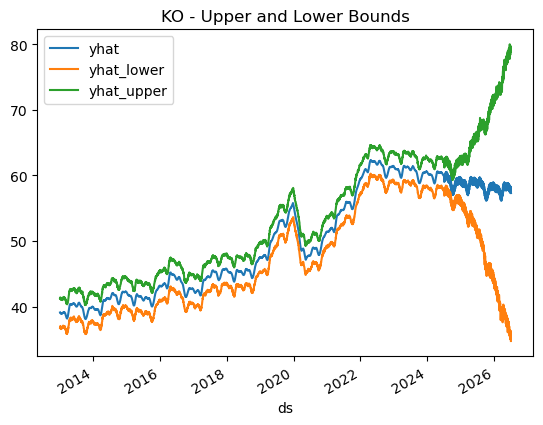

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,38.495156,36.790913,41.285632,38.495156,38.495156,0.591871,0.591871,0.591871,0.285722,0.285722,0.285722,0.306149,0.306149,0.306149,0.0,0.0,0.0,39.087027
1,2013-01-03,38.503040,36.923079,41.373480,38.503040,38.503040,0.536176,0.536176,0.536176,0.251521,0.251521,0.251521,0.284655,0.284655,0.284655,0.0,0.0,0.0,39.039216
2,2013-01-04,38.510925,36.766799,41.169399,38.510925,38.510925,0.538062,0.538062,0.538062,0.275844,0.275844,0.275844,0.262218,0.262218,0.262218,0.0,0.0,0.0,39.048987
3,2013-01-07,38.534579,37.027211,41.339609,38.534579,38.534579,0.478388,0.478388,0.478388,0.285745,0.285745,0.285745,0.192642,0.192642,0.192642,0.0,0.0,0.0,39.012966
4,2013-01-08,38.542463,36.801370,41.327539,38.542463,38.542463,0.469705,0.469705,0.469705,0.299900,0.299900,0.299900,0.169806,0.169806,0.169806,0.0,0.0,0.0,39.012169


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

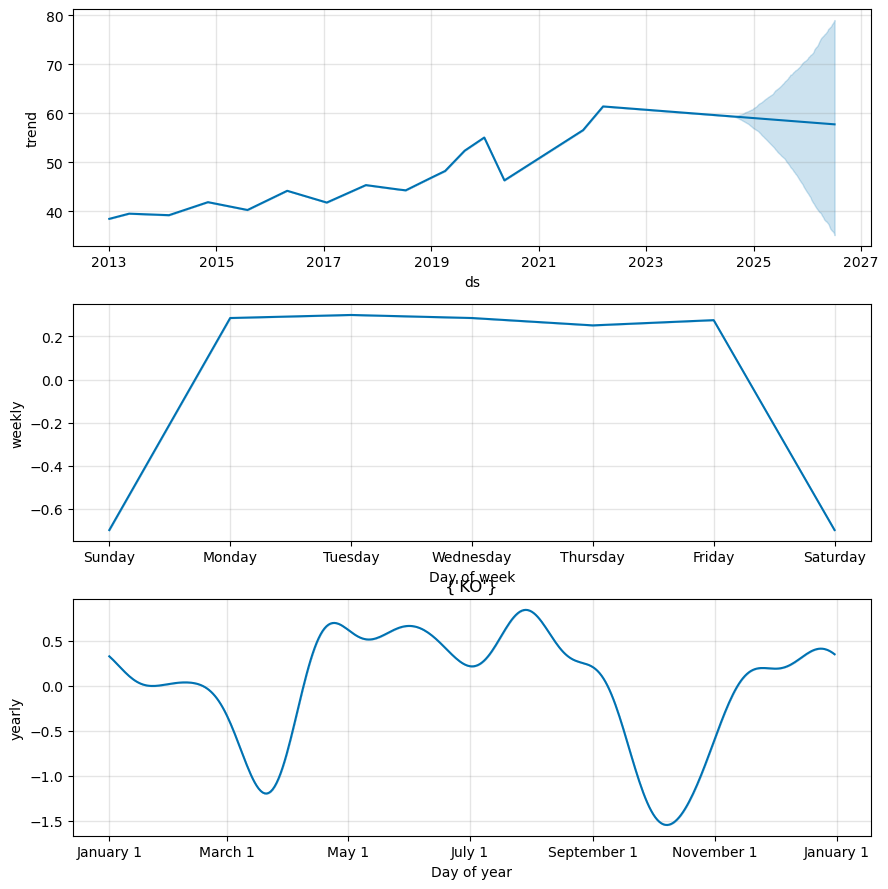


Evaluating models for TSLA


16:43:20 - cmdstanpy - INFO - Chain [1] start processing
16:43:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


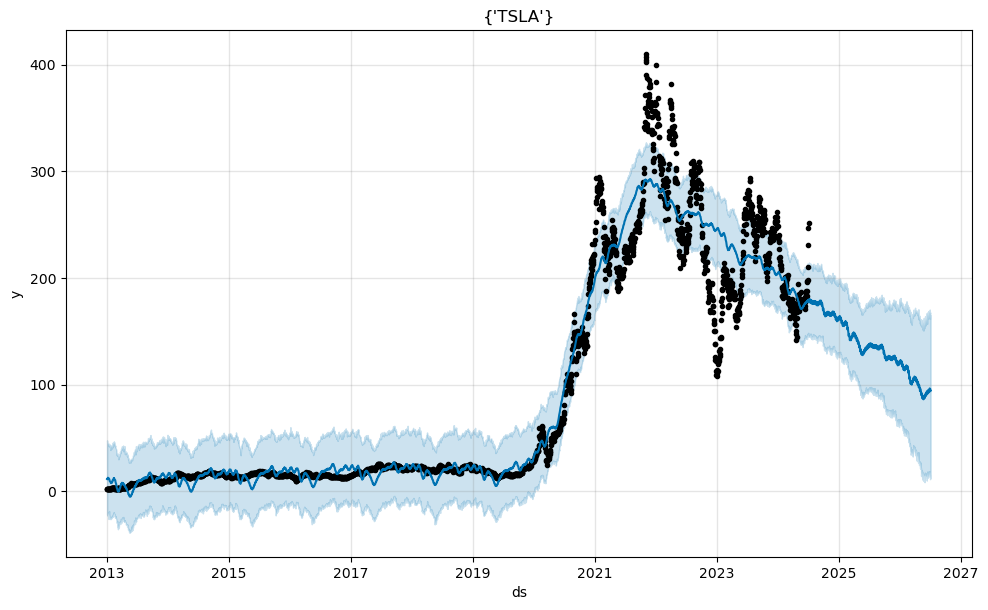

,ds,yhat,yhat_lower,yhat_upper
3621,2026-07-01,96.122572,16.726134,167.184602
3622,2026-07-02,95.826342,11.187719,167.105617
3623,2026-07-03,95.761461,14.673074,167.534272
3624,2026-07-04,94.061673,12.359569,162.080264
3625,2026-07-05,94.170568,17.984893,164.831434


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2013-01-02,5.588301,-21.719746,47.617040,5.588301,5.588301,5.693184,5.693184,5.693184,0.835871,0.835871,0.835871,4.857312,4.857312,4.857312,0.0,0.0,0.0,11.281485
2013-01-03,5.601158,-22.529632,45.139361,5.601158,5.601158,5.522123,5.522123,5.522123,0.391673,0.391673,0.391673,5.130450,5.130450,5.130450,0.0,0.0,0.0,11.123281
2013-01-04,5.614014,-22.962339,44.485528,5.614014,5.614014,5.555640,5.555640,5.555640,0.189630,0.189630,0.189630,5.366010,5.366010,5.366010,0.0,0.0,0.0,11.169655
2013-01-07,5.652585,-20.098059,44.429850,5.652585,5.652585,6.940029,6.940029,6.940029,1.155693,1.155693,1.155693,5.784336,5.784336,5.784336,0.0,0.0,0.0,12.592614
2013-01-08,5.665441,-21.840134,45.115012,5.665441,5.665441,6.508877,6.508877,6.508877,0.695641,0.695641,0.695641,5.813237,5.813237,5.813237,0.0,0.0,0.0,12.174318


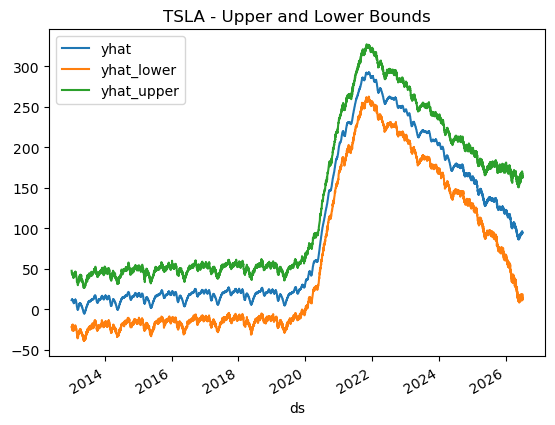

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5.588301,-21.719746,47.617040,5.588301,5.588301,5.693184,5.693184,5.693184,0.835871,0.835871,0.835871,4.857312,4.857312,4.857312,0.0,0.0,0.0,11.281485
1,2013-01-03,5.601158,-22.529632,45.139361,5.601158,5.601158,5.522123,5.522123,5.522123,0.391673,0.391673,0.391673,5.130450,5.130450,5.130450,0.0,0.0,0.0,11.123281
2,2013-01-04,5.614014,-22.962339,44.485528,5.614014,5.614014,5.555640,5.555640,5.555640,0.189630,0.189630,0.189630,5.366010,5.366010,5.366010,0.0,0.0,0.0,11.169655
3,2013-01-07,5.652585,-20.098059,44.429850,5.652585,5.652585,6.940029,6.940029,6.940029,1.155693,1.155693,1.155693,5.784336,5.784336,5.784336,0.0,0.0,0.0,12.592614
4,2013-01-08,5.665441,-21.840134,45.115012,5.665441,5.665441,6.508877,6.508877,6.508877,0.695641,0.695641,0.695641,5.813237,5.813237,5.813237,0.0,0.0,0.0,12.174318


C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\loves\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

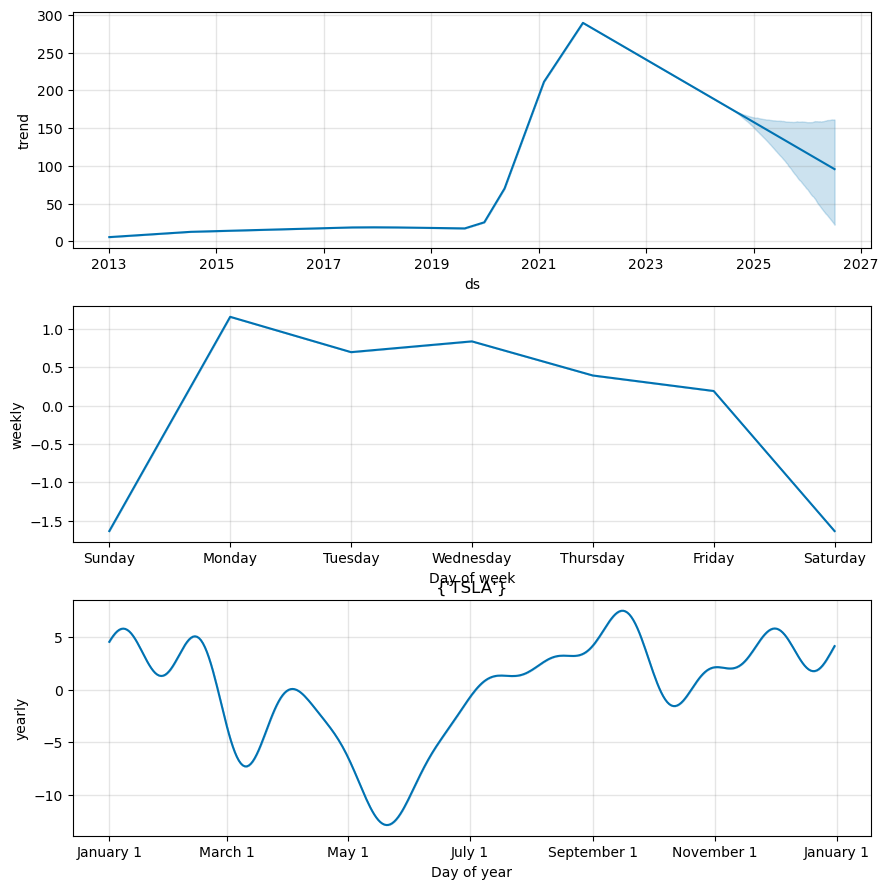

In [26]:
# Train and evaluate models for each ticker
for ticker in tickers:
    print(f'\nEvaluating models for {ticker}')
    train_and_evaluate(ticker, combined_data)